## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  14.758061  1512.125988  0.890013  9.258956  1.589005
1  33.635088   341.964375  0.030633  4.024366  0.274877
2  74.034323   480.023180  0.875324  7.494343  1.310343
3  17.298202   150.912835  0.361838  8.317644  1.193877
4  77.713044   887.694164  0.288236  2.395367  1.356943


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0511312	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0403707	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0302461	total: 58.8ms	remaining: 19.5s
3:	learn: 1.0202149	total: 59.3ms	remaining: 14.8s
4:	learn: 1.0086267	total: 60.1ms	remaining: 12s
5:	learn: 0.9973325	total: 60.5ms	remaining: 10s
6:	learn: 0.9868684	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9755983	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9646541	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9519986	total: 62.6ms	remaining: 6.19s
10:	learn: 0.9433418	total: 63.1ms	remaining: 5.68s
11:	learn: 0.9341610	total: 63.6ms	remaining: 5.23s
12:	learn: 0.9254181	total: 63.9ms	remaining: 4.85s
13:	learn: 0.9169196	total: 64.4ms	remaining: 4.53s
14:	learn: 0.9065915	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8979660	total: 65.3ms	remaining: 4.01s
16:	learn: 0.8905852	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8805107	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8723036	total: 66.7ms	remaining: 3.

95:	learn: 0.4465880	total: 101ms	remaining: 953ms
96:	learn: 0.4429092	total: 102ms	remaining: 947ms
97:	learn: 0.4398787	total: 102ms	remaining: 939ms
98:	learn: 0.4369444	total: 102ms	remaining: 932ms
99:	learn: 0.4341892	total: 103ms	remaining: 925ms
100:	learn: 0.4312508	total: 103ms	remaining: 918ms
101:	learn: 0.4275376	total: 103ms	remaining: 910ms
102:	learn: 0.4247969	total: 104ms	remaining: 903ms
103:	learn: 0.4211219	total: 104ms	remaining: 896ms
104:	learn: 0.4177050	total: 105ms	remaining: 893ms
105:	learn: 0.4147108	total: 105ms	remaining: 887ms
106:	learn: 0.4116146	total: 106ms	remaining: 883ms
107:	learn: 0.4093930	total: 106ms	remaining: 878ms
108:	learn: 0.4059031	total: 107ms	remaining: 873ms
109:	learn: 0.4032461	total: 107ms	remaining: 868ms
110:	learn: 0.3996984	total: 108ms	remaining: 863ms
111:	learn: 0.3971857	total: 108ms	remaining: 859ms
112:	learn: 0.3950498	total: 109ms	remaining: 854ms
113:	learn: 0.3922249	total: 109ms	remaining: 850ms
114:	learn: 0.389

291:	learn: 0.1616523	total: 185ms	remaining: 449ms
292:	learn: 0.1611989	total: 186ms	remaining: 448ms
293:	learn: 0.1604450	total: 186ms	remaining: 447ms
294:	learn: 0.1600881	total: 186ms	remaining: 446ms
295:	learn: 0.1595301	total: 187ms	remaining: 444ms
296:	learn: 0.1589157	total: 187ms	remaining: 443ms
297:	learn: 0.1584956	total: 188ms	remaining: 443ms
298:	learn: 0.1578023	total: 188ms	remaining: 442ms
299:	learn: 0.1571362	total: 189ms	remaining: 440ms
300:	learn: 0.1565671	total: 189ms	remaining: 439ms
301:	learn: 0.1558843	total: 189ms	remaining: 438ms
302:	learn: 0.1553521	total: 190ms	remaining: 436ms
303:	learn: 0.1549319	total: 190ms	remaining: 435ms
304:	learn: 0.1543895	total: 191ms	remaining: 435ms
305:	learn: 0.1540085	total: 191ms	remaining: 434ms
306:	learn: 0.1532978	total: 192ms	remaining: 433ms
307:	learn: 0.1529242	total: 192ms	remaining: 432ms
308:	learn: 0.1525621	total: 193ms	remaining: 431ms
309:	learn: 0.1519616	total: 193ms	remaining: 430ms
310:	learn: 

506:	learn: 0.0793182	total: 281ms	remaining: 274ms
507:	learn: 0.0789152	total: 282ms	remaining: 273ms
508:	learn: 0.0787482	total: 283ms	remaining: 273ms
509:	learn: 0.0785771	total: 283ms	remaining: 272ms
510:	learn: 0.0783398	total: 284ms	remaining: 271ms
511:	learn: 0.0779452	total: 284ms	remaining: 271ms
512:	learn: 0.0776854	total: 285ms	remaining: 270ms
513:	learn: 0.0773472	total: 285ms	remaining: 270ms
514:	learn: 0.0771935	total: 286ms	remaining: 269ms
515:	learn: 0.0768068	total: 286ms	remaining: 268ms
516:	learn: 0.0766467	total: 286ms	remaining: 268ms
517:	learn: 0.0763977	total: 287ms	remaining: 267ms
518:	learn: 0.0760668	total: 287ms	remaining: 266ms
519:	learn: 0.0759067	total: 288ms	remaining: 266ms
520:	learn: 0.0755825	total: 288ms	remaining: 265ms
521:	learn: 0.0754368	total: 289ms	remaining: 264ms
522:	learn: 0.0750601	total: 289ms	remaining: 264ms
523:	learn: 0.0749051	total: 290ms	remaining: 263ms
524:	learn: 0.0746869	total: 290ms	remaining: 262ms
525:	learn: 

694:	learn: 0.0435075	total: 365ms	remaining: 160ms
695:	learn: 0.0433262	total: 366ms	remaining: 160ms
696:	learn: 0.0431507	total: 366ms	remaining: 159ms
697:	learn: 0.0430157	total: 367ms	remaining: 159ms
698:	learn: 0.0428826	total: 367ms	remaining: 158ms
699:	learn: 0.0427083	total: 367ms	remaining: 157ms
700:	learn: 0.0425450	total: 368ms	remaining: 157ms
701:	learn: 0.0424139	total: 368ms	remaining: 156ms
702:	learn: 0.0422846	total: 369ms	remaining: 156ms
703:	learn: 0.0422035	total: 369ms	remaining: 155ms
704:	learn: 0.0420439	total: 370ms	remaining: 155ms
705:	learn: 0.0418875	total: 370ms	remaining: 154ms
706:	learn: 0.0417339	total: 371ms	remaining: 154ms
707:	learn: 0.0416098	total: 371ms	remaining: 153ms
708:	learn: 0.0415219	total: 372ms	remaining: 153ms
709:	learn: 0.0414064	total: 373ms	remaining: 152ms
710:	learn: 0.0412851	total: 373ms	remaining: 152ms
711:	learn: 0.0411852	total: 374ms	remaining: 151ms
712:	learn: 0.0410670	total: 374ms	remaining: 151ms
713:	learn: 

799:	learn: 0.0324902	total: 426ms	remaining: 107ms
800:	learn: 0.0323887	total: 427ms	remaining: 106ms
801:	learn: 0.0323502	total: 427ms	remaining: 105ms
802:	learn: 0.0323122	total: 428ms	remaining: 105ms
803:	learn: 0.0322318	total: 428ms	remaining: 104ms
804:	learn: 0.0321996	total: 429ms	remaining: 104ms
805:	learn: 0.0321317	total: 429ms	remaining: 103ms
806:	learn: 0.0319677	total: 430ms	remaining: 103ms
807:	learn: 0.0318890	total: 430ms	remaining: 102ms
808:	learn: 0.0317278	total: 431ms	remaining: 102ms
809:	learn: 0.0316620	total: 431ms	remaining: 101ms
810:	learn: 0.0315039	total: 432ms	remaining: 101ms
811:	learn: 0.0314055	total: 432ms	remaining: 100ms
812:	learn: 0.0313200	total: 432ms	remaining: 99.5ms
813:	learn: 0.0312563	total: 433ms	remaining: 98.9ms
814:	learn: 0.0311937	total: 433ms	remaining: 98.3ms
815:	learn: 0.0310401	total: 434ms	remaining: 97.8ms
816:	learn: 0.0309444	total: 434ms	remaining: 97.2ms
817:	learn: 0.0308833	total: 434ms	remaining: 96.6ms
818:	l

984:	learn: 0.0191678	total: 511ms	remaining: 7.78ms
985:	learn: 0.0191531	total: 511ms	remaining: 7.26ms
986:	learn: 0.0191440	total: 512ms	remaining: 6.74ms
987:	learn: 0.0190760	total: 512ms	remaining: 6.22ms
988:	learn: 0.0190574	total: 512ms	remaining: 5.7ms
989:	learn: 0.0189989	total: 513ms	remaining: 5.18ms
990:	learn: 0.0189788	total: 513ms	remaining: 4.66ms
991:	learn: 0.0189223	total: 514ms	remaining: 4.14ms
992:	learn: 0.0189079	total: 514ms	remaining: 3.62ms
993:	learn: 0.0188971	total: 514ms	remaining: 3.1ms
994:	learn: 0.0188248	total: 515ms	remaining: 2.59ms
995:	learn: 0.0188114	total: 515ms	remaining: 2.07ms
996:	learn: 0.0187560	total: 516ms	remaining: 1.55ms
997:	learn: 0.0187455	total: 516ms	remaining: 1.03ms
998:	learn: 0.0187352	total: 517ms	remaining: 517us
999:	learn: 0.0186699	total: 517ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

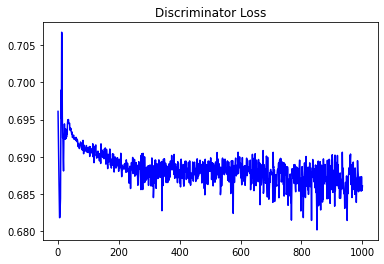

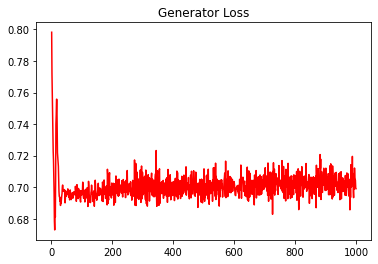

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2649415082237221


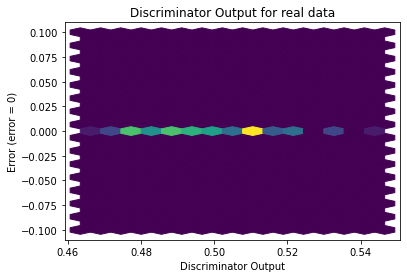

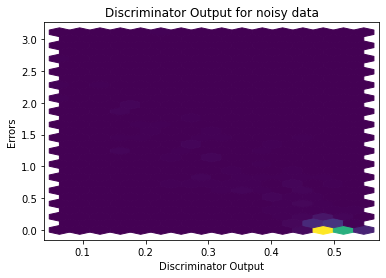

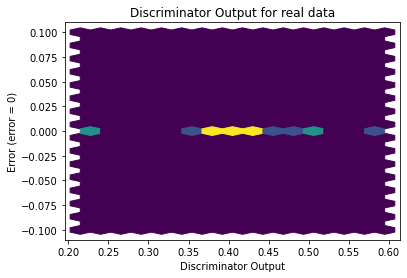

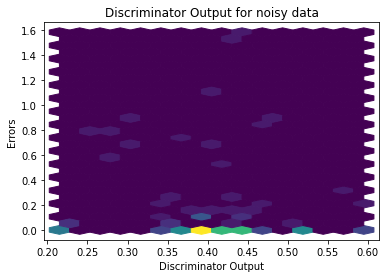

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


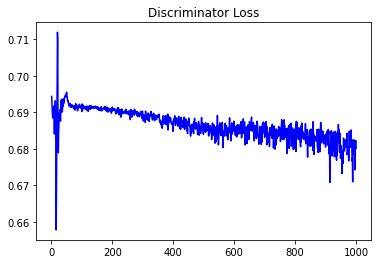

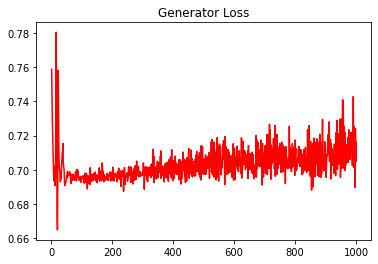

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23552070045421244


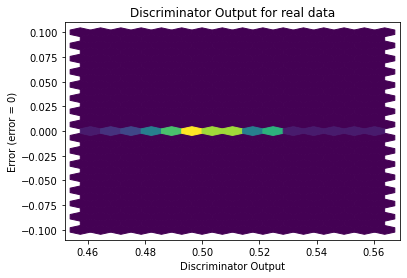

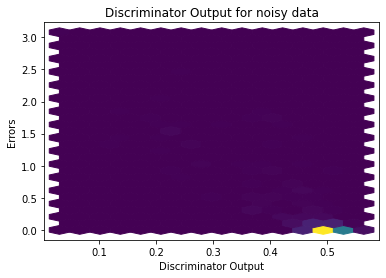

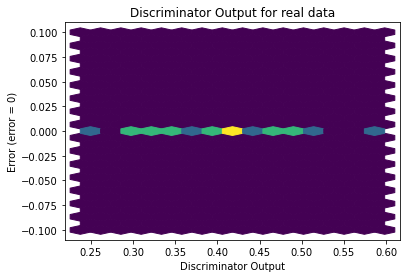

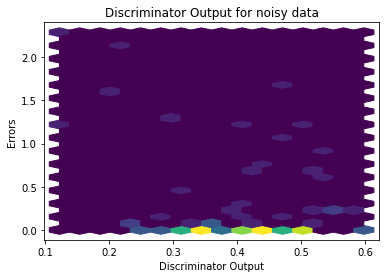

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8677]], requires_grad=True)
